olive_face_datasets

In [116]:
#导入必要的包
import torch
import torch.nn as nn  #导入神经网络模块
import torch.optim as optim  #导入优化器模块
from sklearn.datasets import fetch_olivetti_faces  #导入sklearn中的人脸数据集
from torch.utils.data import DataLoader  #导入数据加载器
# from torchvision.transforms.v2 import ToTensor  #导入数据转换器

In [117]:
#数据加载
faces = fetch_olivetti_faces(data_home='./face_data', shuffle=True)  #加载数据集


In [118]:
# import matplotlib.pyplot as plt  #导入绘图库

# face = faces.images[300]  #取出第n张人脸
# plt.imshow(face, cmap='gray')  #绘制灰度图
# plt.show()  #显示图像

In [119]:
# faces.data[0]
# faces.target

In [120]:
#初始化参数
LR =1e-3  #学习率
epochs = 50  #训练轮数
BATCH_SIZE = 128  #批次大小

In [121]:
#数据转换
images = torch.tensor(faces.data.reshape(400, -1) / 255.0) #将数据转换为张量,归一化到 [0, 1]
labels = torch.tensor(faces.target) #将标签转换为张量

from sklearn.model_selection import train_test_split
#划分数据集
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, 
                                        test_size=0.3, random_state=42, stratify=labels)

#将数据和标签打包成元组
train_dataset = [(img,lbs) for img,lbs in zip(images_train,labels_train)] 
test_dataset = [(img,lbs) for img,lbs in zip(images_test,labels_test)]

#数据封装
train_datadl = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_datadl = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)



In [122]:
#导入模型
from olivetti_face_model import faceNN
model = faceNN()  #实例化模型

In [123]:
#定义损失函数
loss_fn = nn.CrossEntropyLoss()  #交叉熵损失函数
#定义优化器

# optimizer = optim.SGD(model.parameters(), lr=LR)
# optimizer = optim.RMSprop(model.parameters(), lr=LR)
# optimizer = optim.Adam(model.parameters(), lr=LR)
optimizer = optim.AdamW(model.parameters(), lr=LR)

In [124]:
#运行到cuda上
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
device

device(type='cpu')

In [125]:
#初始化列表
train_loss = []
#训练模型
 # 正则化&归一化生效
model.train() 
#提取数据
for epoch in range(epochs): 
    for img, lbs in train_datadl:
        #数据转移到cuda上
        img, lbs = img.to(device), lbs.to(device)
        #前向运算
        out = model(img)  #输出预测值
        #计算损失
        loss = loss_fn(out, lbs)  #计算损失
        #梯度清零
        optimizer.zero_grad()  #梯度清零
        #反向传播
        loss.backward()  #反向传播
        #更新参数
        optimizer.step()  #更新参数

        #记录损失
        train_loss.append(loss.item())
        #打印损失
    print(f'epoch:{epoch}, loss:{loss.item():.4f}')  #打印损失

epoch:0, loss:3.7656
epoch:1, loss:1.7426
epoch:2, loss:1.0102
epoch:3, loss:0.5274
epoch:4, loss:0.2824
epoch:5, loss:0.2838
epoch:6, loss:0.2086
epoch:7, loss:0.2624
epoch:8, loss:0.0736
epoch:9, loss:0.0819
epoch:10, loss:0.1212
epoch:11, loss:0.0752
epoch:12, loss:0.0399
epoch:13, loss:0.0372
epoch:14, loss:0.0273
epoch:15, loss:0.0281
epoch:16, loss:0.0312
epoch:17, loss:0.0296
epoch:18, loss:0.1173
epoch:19, loss:0.0201
epoch:20, loss:0.0213
epoch:21, loss:0.0148
epoch:22, loss:0.0156
epoch:23, loss:0.0100
epoch:24, loss:0.0080
epoch:25, loss:0.0089
epoch:26, loss:0.0117
epoch:27, loss:0.0090
epoch:28, loss:0.0103
epoch:29, loss:0.0057
epoch:30, loss:0.0102
epoch:31, loss:0.0077
epoch:32, loss:0.0072
epoch:33, loss:0.0158
epoch:34, loss:0.0064
epoch:35, loss:0.0072
epoch:36, loss:0.0111
epoch:37, loss:0.0042
epoch:38, loss:0.0051
epoch:39, loss:0.0066
epoch:40, loss:0.0051
epoch:41, loss:0.0046
epoch:42, loss:0.0070
epoch:43, loss:0.0026
epoch:44, loss:0.0041
epoch:45, loss:0.002

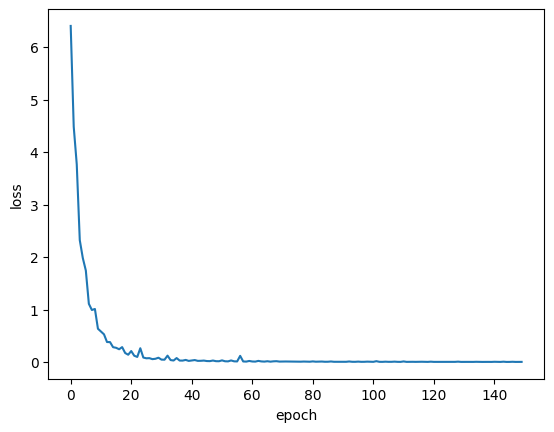

In [128]:
import matplotlib.pyplot as plt  #导入绘图库
plt.plot(train_loss)  #绘制损失曲线
plt.xlabel('epoch')  #x轴标签
plt.ylabel('loss')  #y轴标签
plt.show()  #显示图像


In [129]:
#模型推理
model.eval()  #正则化&归一化失效
total = 0  #总数
correct = 0  #正确数
with torch.no_grad():
#提取数据
    for img, lbs in test_datadl:
        img, lbs = img.to(device), lbs.to(device)
        #前向运算
        out = model(img)
        #返回每行最大值的索引
        _, predicted = torch.max(out, dim=-1)
        #计算总数
        total += lbs.size(0)
        #返回相同的元素个数
        correct += (predicted == lbs).sum().item()
    #打印准确率
    print(f'{correct/total*100:.4f}%')




97.5000%
